# Premier League Data Analysis and Visualization

## Importing the Basic Libraries

In [1]:
# basic operations
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')

# file path
import os
print(os.listdir("../../datasets/PremierLeaguePlayerStats/"))

['PremierLeaguePlayerStats.ipynb', '.gitignore', '.ipynb_checkpoints', 'PremierLeaguePlayerStats.csv']


## Reading the Data

In [2]:
# reading the data and checking the run time

%time data = pd.read_csv('../../datasets/PremierLeaguePlayerStats/PremierLeaguePlayerStats.csv')

print(data.shape)

CPU times: user 8.46 ms, sys: 3.03 ms, total: 11.5 ms
Wall time: 16.6 ms
(540, 10)


In [3]:
# checking the first 5 rows and columns
data.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [4]:
# decsribing the data

data.describe()

,Rank,GP,GS,MIN,G,ASST,SHOTS,SOG
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.500000,18.985185,15.090741,1353.657407,1.825926,1.275926,12.331481,5.909259
std,156.028843,12.847896,12.437641,1091.594162,3.551277,2.129346,16.651935,9.253446
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.750000,7.000000,2.000000,241.500000,0.000000,0.000000,0.000000,0.000000
50%,270.500000,20.000000,13.500000,1219.500000,0.000000,0.000000,6.000000,2.000000
75%,405.250000,30.000000,26.000000,2295.500000,2.000000,2.000000,17.000000,7.000000
max,540.000000,38.000000,38.000000,3420.000000,23.000000,20.000000,95.000000,59.000000


In [5]:
# checking NULL value

data.isnull().sum()

Rank      0
PLAYER    0
TEAM      0
GP        0
GS        0
MIN       0
G         0
ASST      0
SHOTS     0
SOG       0
dtype: int64

## New Features

Percentage of shots goes to goal post.

Shots Accuracy % = (Total Shots(Shots)/Shots on Goal(SOG)) * 100

Percentage of goal accuracy

Goal Accuracy % = (Goals(G)/(Shots on goal(SOG)) * 100

Time required to shot one goal

min_per_goal = (Min(MIN)/Goals(G)) * 100

In [6]:
data.loc[data['G'] > 0, 'SA%'] =  round(data['SOG']/data['SHOTS'],3)*100
data.loc[data['G'] > 0, 'GA%'] =  round(data['G']/data['SHOTS'],3)*100
data.loc[data['G'] > 0, 'MPG'] = round(data['MIN']/data['G'],1)

In [7]:
data.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,60.6,32.4,131.9
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,57.6,33.3,127.8
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,60.0,31.4,142.6
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,55.9,29.4,133.0
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,62.1,20.0,151.8


In [8]:
# check for NaN values
data.isna().sum()

Rank        0
PLAYER      0
TEAM        0
GP          0
GS          0
MIN         0
G           0
ASST        0
SHOTS       0
SOG         0
SA%       289
GA%       289
MPG       289
dtype: int64

In [9]:
# fill NaN values with lowest accuracy (0) for SA% and GA% beca
data['SA%'] = data['SA%'].fillna(0)
data['GA%'] = data['GA%'].fillna(0)

# fill all NaN with max time for MPG
data['MPG'] = data['MPG'].fillna(data['MPG'].max())

In [10]:
# top 10 player with highest shot accuracy
data.sort_values(by=['SA%'], ascending=False).head(10)

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
239,240,DeAndre Yedlin,Newcastle United,16,10,936,1,0,1,1,100.0,100.0,936.0
108,109,Jeffrey Schlupp,Crystal Palace,17,11,1034,3,1,12,10,83.3,25.0,344.7
148,149,Ciaran Clark,Newcastle United,14,14,1188,2,0,5,4,80.0,40.0,594.0
165,166,Florian Lejeune,Newcastle United,6,4,441,2,0,4,3,75.0,50.0,220.5
24,25,Troy Deeney,Watford,27,26,2234,10,2,32,23,71.9,31.2,223.4
190,191,Cédric Ricardo Alves Soares,Arsenal,21,19,1559,1,1,7,5,71.4,14.3,1559.0
221,222,Pedro Rodríguez Ledesma,Chelsea,11,8,662,1,1,14,10,71.4,7.1,662.0
88,89,Bernard Anício Caldeira Duarte,Everton,27,15,1278,3,2,7,5,71.4,42.9,426.0
94,95,Michael Obafemi,Southampton,21,8,661,3,2,7,5,71.4,42.9,220.3
114,115,Naby Deco Keïta,Liverpool,18,9,814,2,3,10,7,70.0,20.0,407.0


In [11]:
# top 10 player with highest shot accuracy
data.sort_values(by=['GA%'], ascending=False).head(10)

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
239,240,DeAndre Yedlin,Newcastle United,16,10,936,1,0,1,1,100.0,100.0,936.0
163,164,Matthew Longstaff,Newcastle United,9,6,572,2,0,3,2,66.7,66.7,286.0
165,166,Florian Lejeune,Newcastle United,6,4,441,2,0,4,3,75.0,50.0,220.5
113,114,Steven Bergwijn,Tottenham Hotspur,14,8,702,3,1,6,4,66.7,50.0,234.0
174,175,Xherdan Shaqiri,Liverpool,7,2,182,1,0,2,1,50.0,50.0,182.0
78,79,Jorge Luiz Frello Filho,Chelsea,31,27,2384,4,2,8,4,50.0,50.0,596.0
88,89,Bernard Anício Caldeira Duarte,Everton,27,15,1278,3,2,7,5,71.4,42.9,426.0
94,95,Michael Obafemi,Southampton,21,8,661,3,2,7,5,71.4,42.9,220.3
144,145,Sokratis Papastathopoulos,Arsenal,19,19,1697,2,0,5,2,40.0,40.0,848.5
148,149,Ciaran Clark,Newcastle United,14,14,1188,2,0,5,4,80.0,40.0,594.0


In [12]:
# top 10 player with highest shot accuracy
data.sort_values(by=['MPG'], ascending=True).head(10)

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
10,11,Sergio Leonel Agüero del Castillo,Manchester City,24,18,1456,16,3,54,28,51.9,29.6,91.0
244,245,Curtis Jones,Liverpool,6,1,122,1,0,5,2,40.0,20.0,122.0
32,33,Olivier Giroud,Chelsea,18,12,999,8,0,35,19,54.3,22.9,124.9
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,57.6,33.3,127.8
23,24,Mason Greenwood,Manchester United,31,12,1312,10,1,32,20,62.5,31.2,131.2
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,60.6,32.4,131.9
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,55.9,29.4,133.0
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,60.0,31.4,142.6
6,7,Harry Kane,Tottenham Hotspur,29,29,2589,18,2,62,37,59.7,29.0,143.8
12,13,Gabriel Fernando de Jesus,Manchester City,34,21,2027,14,7,81,48,59.3,17.3,144.8


## Analyzing Club Data

In [13]:
def team(x):
    return data[data['TEAM'] == x]

### Analysing Arsenal club data

In [14]:
arsenal = team('Arsenal')

In [15]:
# top 10 arsenal player with highest shot accuracy
arsenal.sort_values(by=['MPG'], ascending=True).head(10)

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,60.0,31.4,142.6
22,23,Alexandre Lacazette,Arsenal,30,22,1877,10,4,44,26,59.1,22.7,187.7
99,100,Gabriel Teodoro Martinelli Silva,Arsenal,14,6,655,3,0,10,5,50.0,30.0,218.3
166,167,Eddie Nketiah,Arsenal,13,7,633,2,0,13,5,38.5,15.4,316.5
59,60,Nicolas Pépé,Arsenal,31,22,2015,5,6,37,18,48.6,13.5,403.0
202,203,Reiss Nelson,Arsenal,17,7,627,1,0,6,4,66.7,16.7,627.0
206,207,Joseph Willock,Arsenal,29,8,844,1,1,12,5,41.7,8.3,844.0
144,145,Sokratis Papastathopoulos,Arsenal,19,19,1697,2,0,5,2,40.0,40.0,848.5
241,242,Kieran Tierney,Arsenal,15,12,992,1,1,5,2,40.0,20.0,992.0
204,205,Calum Chambers,Arsenal,14,13,1103,1,1,8,2,25.0,12.5,1103.0


In [16]:
# top 10 arsenal player with highest goal accuracy
arsenal.sort_values(by=['GA%'], ascending=False).head(10)

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
144,145,Sokratis Papastathopoulos,Arsenal,19,19,1697,2,0,5,2,40.0,40.0,848.5
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,60.0,31.4,142.6
99,100,Gabriel Teodoro Martinelli Silva,Arsenal,14,6,655,3,0,10,5,50.0,30.0,218.3
22,23,Alexandre Lacazette,Arsenal,30,22,1877,10,4,44,26,59.1,22.7,187.7
233,234,Mesut Özil,Arsenal,18,18,1448,1,2,5,3,60.0,20.0,1448.0
242,243,Héctor Bellerín,Arsenal,15,13,1159,1,0,5,2,40.0,20.0,1159.0
241,242,Kieran Tierney,Arsenal,15,12,992,1,1,5,2,40.0,20.0,992.0
202,203,Reiss Nelson,Arsenal,17,7,627,1,0,6,4,66.7,16.7,627.0
166,167,Eddie Nketiah,Arsenal,13,7,633,2,0,13,5,38.5,15.4,316.5
190,191,Cédric Ricardo Alves Soares,Arsenal,21,19,1559,1,1,7,5,71.4,14.3,1559.0


## Data Visualization

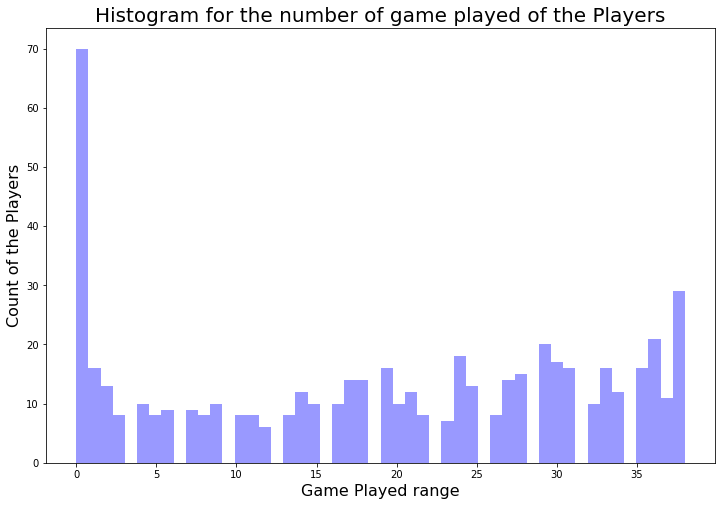

In [17]:
x = data.GP
plt.figure(figsize = (12, 8))

ax = sns.distplot(x, bins = 50, kde = False, color = 'b')
ax.set_xlabel(xlabel = 'Game Played range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the number of game played of the Players', fontsize = 20)
plt.show()

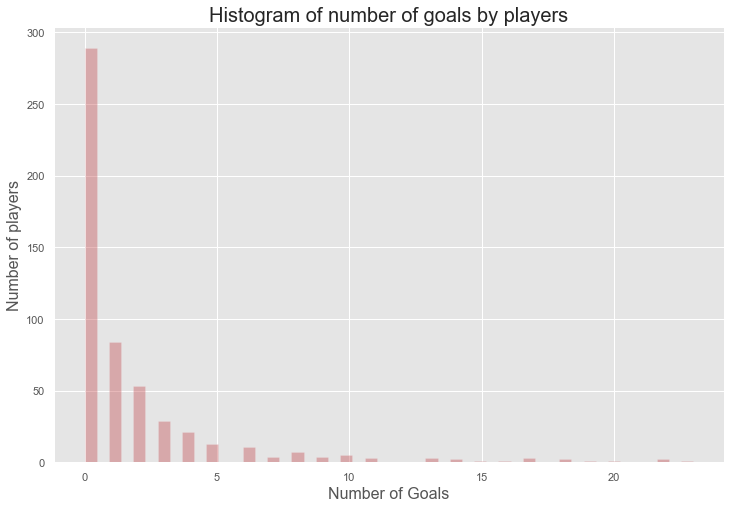

In [18]:
# To show Different overall scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.G
plt.figure(figsize = (12,8))
plt.style.use('ggplot')

ax = sns.distplot(x, bins = 50, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Number of Goals", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of number of goals by players', fontsize = 20)
plt.show()

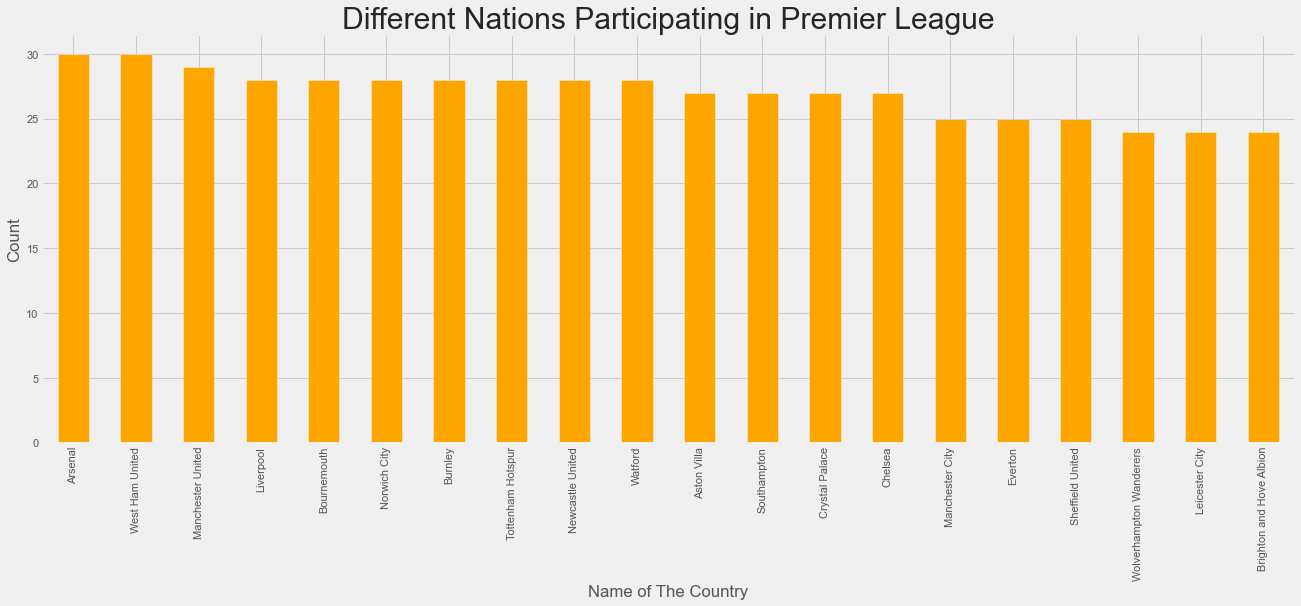

In [19]:
# To show Different nations participating in the premier league

plt.style.use('fivethirtyeight')
data['TEAM'].value_counts().plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in Premier League', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('Count')
plt.show()

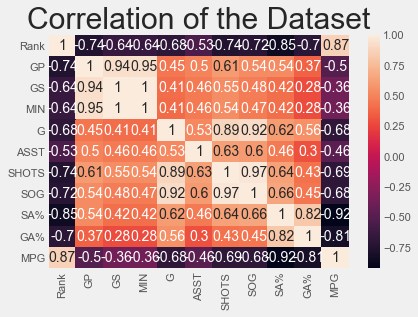

In [20]:
# plotting a correlation heatmap

sns.heatmap(data.corr(), annot = True)

plt.title('Correlation of the Dataset', fontsize = 30)
plt.show()

In [21]:
# picking up the countries with highest number of players to compare their overall scores

data['TEAM'].value_counts()

Arsenal                     30
West Ham United             30
Manchester United           29
Liverpool                   28
Bournemouth                 28
Norwich City                28
Burnley                     28
Tottenham Hotspur           28
Newcastle United            28
Watford                     28
Aston Villa                 27
Southampton                 27
Crystal Palace              27
Chelsea                     27
Manchester City             25
Everton                     25
Sheffield United            25
Wolverhampton Wanderers     24
Leicester City              24
Brighton and Hove Albion    24
Name: TEAM, dtype: int64

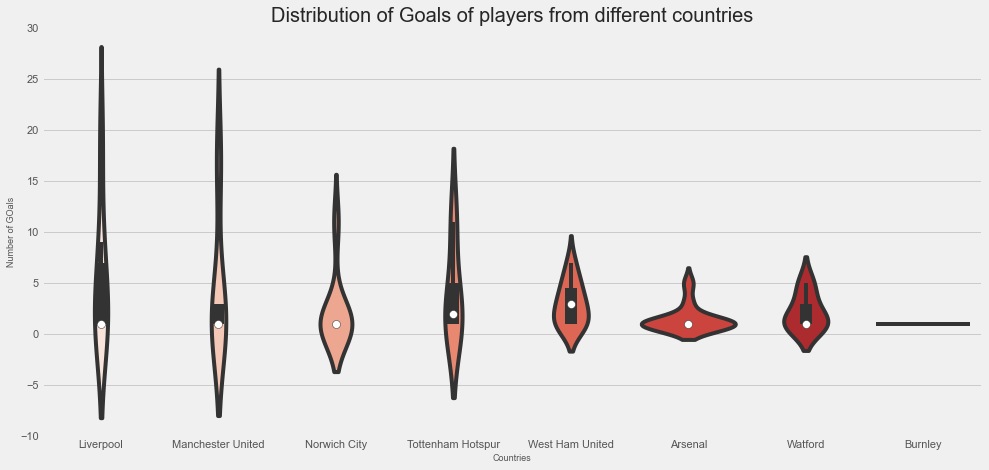

In [22]:
# Every Nations' Player and their goals

teams = ('West Ham United', 'Arsenal', 'Manchester United', 'Burnley', 'Norwich City', 'Liverpool', 'Watford', 'Tottenham Hotspur')
data_teams = data.loc[data['TEAM'].isin(teams) & data['G']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_teams['TEAM'], y = data_teams['G'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Number of GOals', fontsize = 9)
ax.set_title(label = 'Distribution of Goals of players from different countries', fontsize = 20)
plt.show()


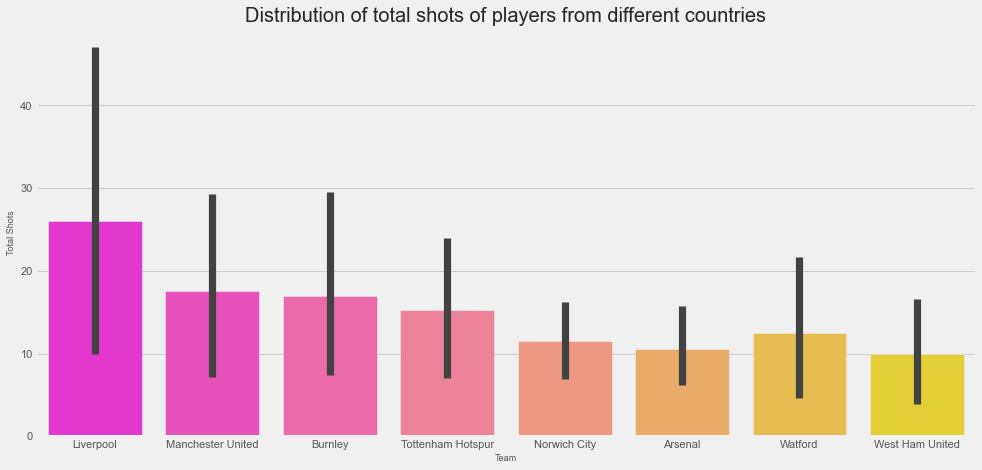

In [23]:
# Every Nations' Player and their overall scores

teams = ('West Ham United', 'Arsenal', 'Manchester United', 'Burnley', 'Norwich City', 'Liverpool', 'Watford', 'Tottenham Hotspur')
data_teams = data.loc[data['TEAM'].isin(teams) & data['SHOTS']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_teams['TEAM'], y = data_teams['SHOTS'], palette = 'spring')
ax.set_xlabel(xlabel = 'Team', fontsize = 9)
ax.set_ylabel(ylabel = 'Total Shots', fontsize = 9)
ax.set_title(label = 'Distribution of total shots of players from different countries', fontsize = 20)
plt.show()

In [24]:
# finding 20 top Players who have max number of goals

highest_goals = data.sort_values('G', ascending = False)[['PLAYER','TEAM','GP','GS','G']].head(20)
print(highest_goals)

                               PLAYER                     TEAM  GP  GS   G
0                         Jamie Vardy           Leicester City  35  34  23
1                          Danny Ings              Southampton  38  32  22
2           Pierre-Emerick Aubameyang                  Arsenal  36  35  22
3           Raheem Shaquille Sterling          Manchester City  33  30  20
4                 Mohamed Salah Ghaly                Liverpool  34  33  19
5                          Sadio Mané                Liverpool  35  31  18
6                          Harry Kane        Tottenham Hotspur  29  29  18
7       Raúl Alonso Jiménez Rodríguez  Wolverhampton Wanderers  38  37  17
8                     Marcus Rashford        Manchester United  31  31  17
9                     Anthony Martial        Manchester United  32  31  17
10  Sergio Leonel Agüero del Castillo          Manchester City  24  18  16
11               Tammy Bakumo-Abraham                  Chelsea  34  25  15
12          Gabriel Ferna

In [25]:
# finding 20 top Players who have lowest number of goals

lowest_goals = data.sort_values('G', ascending = True)[['PLAYER','TEAM','GP','GS','G']].head(20)
print(lowest_goals)

                                PLAYER               TEAM  GP  GS  G
269                Oleksandr Zinchenko    Manchester City  19  13  0
368                     Matthew Lowton            Burnley  17  17  0
367                         Kevin Long            Burnley   8   6  0
366                         Ben Gibson            Burnley   0   0  0
365                          Jack Cork            Burnley  30  30  0
364                      Phil Bardsley            Burnley  21  21  0
363              David de Gea Quintana  Manchester United  38  38  0
362                  Aaron Wan-Bissaka  Manchester United  35  34  0
361                      Axel Tuanzebe  Manchester United   5   2  0
360                          Luke Shaw  Manchester United  24  20  0
359                      Sergio Romero  Manchester United   0   0  0
358                      Nemanja Matic  Manchester United  21  18  0
357                          Juan Mata  Manchester United  19   8  0
356        Emerson Palmieri dos Sa

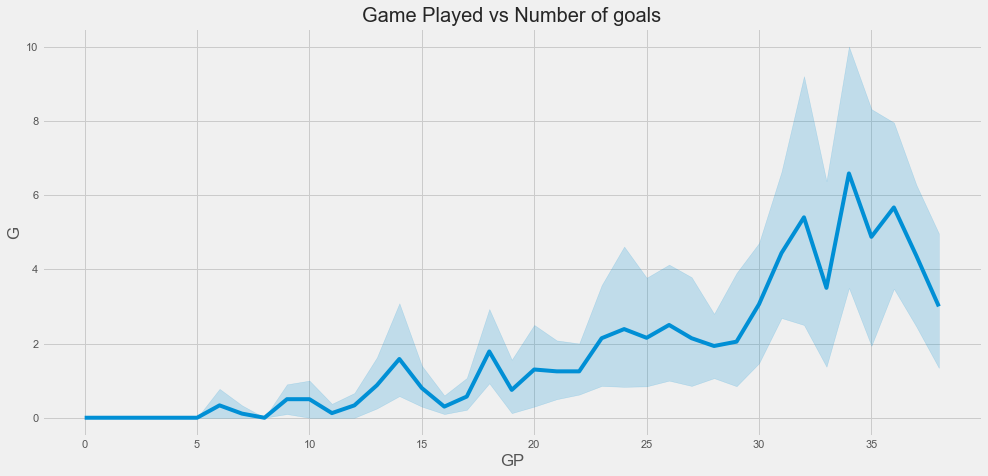

In [26]:
sns.lineplot(data['GP'], data['G'])
plt.title('Game Played vs Number of goals', fontsize = 20)

plt.show()

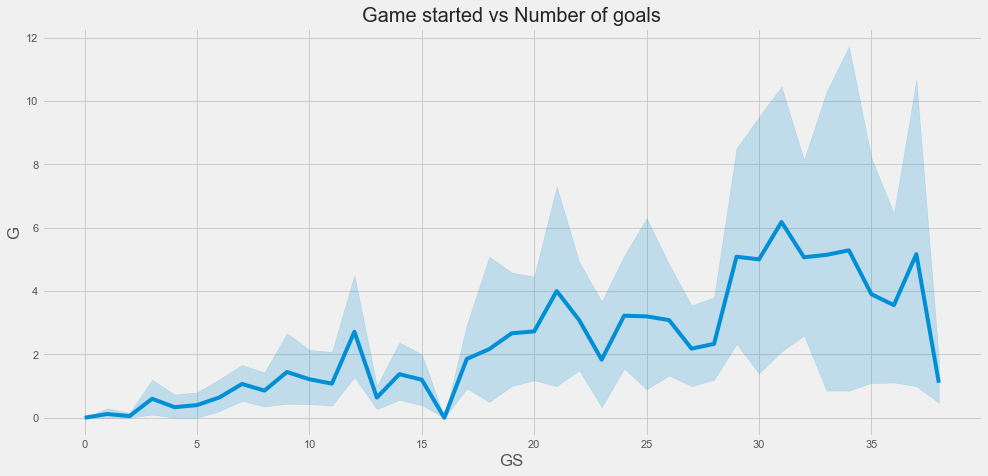

In [27]:
sns.lineplot(data['GS'], data['G'])
plt.title('Game started vs Number of goals', fontsize = 20)

plt.show()

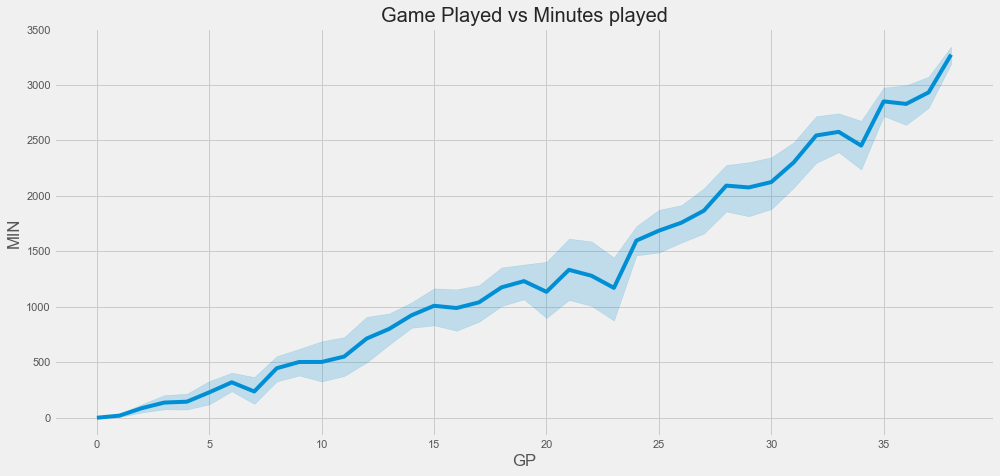

In [28]:
sns.lineplot(data['GP'], data['MIN'])
plt.title('Game Played vs Minutes played', fontsize = 20)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1622: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  barfunc(barpos, self.statistic, self.width,


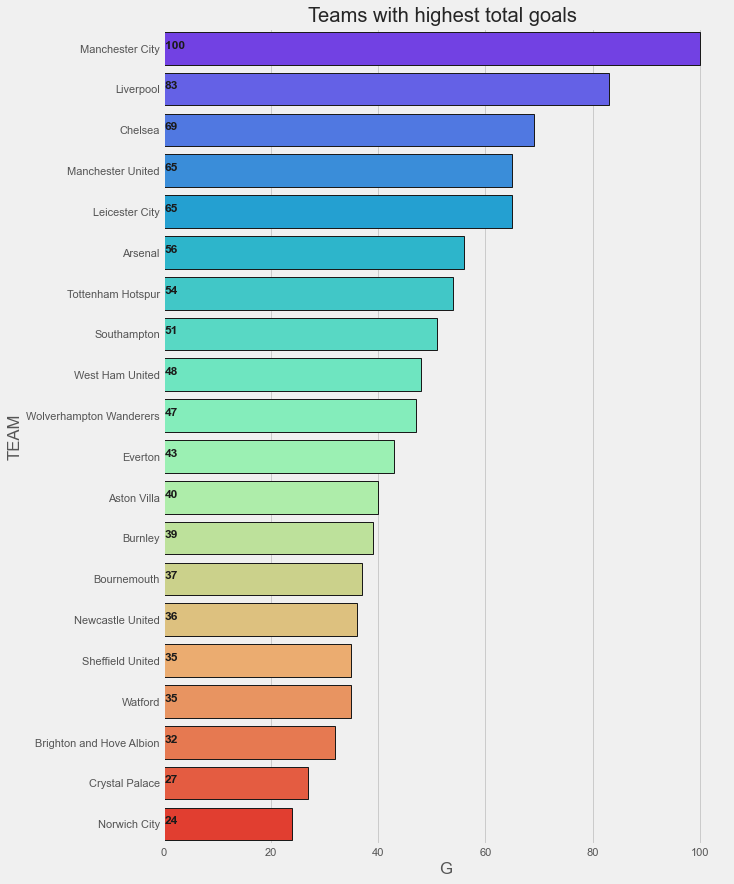

In [29]:
# total goals by each team
goals = data.groupby("TEAM")["G"].sum().reset_index().sort_values(by = "G",ascending = False)

plt.figure(figsize=(9,14))
ax = sns.barplot(x="G",y="TEAM",
                 data=goals,palette="rainbow",
                 linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["G"][:20]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Teams with highest total goals ")
plt.show()